In [1]:
# make the imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import io, signal

In [2]:
monkey_ecog_data = io.loadmat('ECoG_monkey/ECoG_monkey.mat', squeeze_me = True)
print(monkey_ecog_data.keys())
print(monkey_ecog_data['fs'])
print(monkey_ecog_data['ecog_eyesopen'].shape)
print(monkey_ecog_data['labels'])
print(monkey_ecog_data['elec_num'])

plt.figure(figsize=(15,3))
plt.plot(np.arange(0,monkey_ecog_data['ecog_eyesopen'].shape[1]/monkey_ecog_data['fs'],1/monkey_ecog_data['fs']), 
         monkey_ecog_data['ecog_eyesopen'].T)
plt.xlim([0,10])
plt.xlabel('Time (s)')
plt.legend(monkey_ecog_data['labels'])

FileNotFoundError: [Errno 2] No such file or directory: 'ECoG_monkey/ECoG_monkey.mat'

In [ ]:
fs = monkey_ecog_data['fs']
print('Sampling rate = %iHz'%fs)
print(monkey_ecog_data['elec_num'])
eyesopenLFP = monkey_ecog_data['ecog_eyesopen'][1,:]/1000
eyesclosedLFP = monkey_ecog_data['ecog_eyesclosed'][1,:]/1000
sleepingMonkeyLFP = monkey_ecog_data['ecog_anes'][1,:]/1000

t_Open = np.arange(0, len(eyesopenLFP)/fs, 1/fs)
t_Closed = np.arange(0, len(eyesclosedLFP)/fs, 1/fs)
t_Sleep = np.arange(0, len(sleepingMonkeyLFP)/fs, 1/fs)


FIR_theta = signal.firwin(751, fs=fs, cutoff = [4,10], pass_zero = False) 
FIR_gamma = signal.firwin(751, fs=fs, cutoff = [30,50], pass_zero = False) 
FIR_alpha = signal.firwin(751, fs=fs, cutoff = [6,12], pass_zero = False) 
FIR_beta = signal.firwin(751, fs=fs, cutoff = [12.5,30], pass_zero = False)


In [ ]:
theta_oscOpen = np.convolve(eyesopenLFP, FIR_theta, mode= 'same')
theta_oscClosed = np.convolve(eyesclosedLFP, FIR_theta, mode= 'same')
theta_oscSleep = np.convolve(sleepingMonkeyLFP, FIR_theta, mode= 'same')

gamma_oscOpen = np.convolve(eyesopenLFP, FIR_gamma, mode= 'same')
gamma_oscClosed = np.convolve(eyesclosedLFP, FIR_gamma, mode= 'same')
gamma_oscSleep = np.convolve(sleepingMonkeyLFP, FIR_gamma, mode= 'same')

beta_oscOpen = np.convolve(eyesopenLFP, FIR_beta, mode= 'same')
beta_oscClosed = np.convolve(eyesclosedLFP, FIR_beta, mode= 'same')
beta_oscSleep = np.convolve(sleepingMonkeyLFP, FIR_beta, mode= 'same')

alpha_oscOpen = np.convolve(eyesopenLFP, FIR_alpha, mode= 'same')
alpha_oscClosed = np.convolve(eyesclosedLFP, FIR_alpha, mode= 'same')
alpha_oscSleep = np.convolve(sleepingMonkeyLFP, FIR_alpha, mode= 'same')

In [ ]:
x_a_thetaOpen = signal.hilbert(theta_oscOpen)
x_a_thetaClosed = signal.hilbert(theta_oscClosed)
x_a_thetaSleep = signal.hilbert(theta_oscSleep)

x_a_gammaOpen = signal.hilbert(gamma_oscOpen)
x_a_gammaClosed = signal.hilbert(gamma_oscClosed)
x_a_gammaSleep = signal.hilbert(gamma_oscSleep)

x_a_betaOpen = signal.hilbert(beta_oscOpen)
x_a_betaClosed = signal.hilbert(beta_oscClosed)
x_a_betaSleep = signal.hilbert(beta_oscSleep)

x_a_alphaOpen = signal.hilbert(alpha_oscOpen)
x_a_alphaClosed = signal.hilbert(alpha_oscClosed)
x_a_alphaSleep = signal.hilbert(alpha_oscSleep)

In [ ]:

def compute_power_phase(x_a):
    power = np.abs(x_a)**2
    phase = np.angle(x_a)
    return power, phase


In [ ]:
theta_powerOpen, theta_phaseOpen = compute_power_phase(x_a_thetaOpen)
theta_powerClosed, theta_phaseClosed = compute_power_phase(x_a_thetaClosed)
theta_powerSleep, theta_phaseSleep = compute_power_phase(x_a_thetaSleep)

gamma_powerOpen, gamma_phaseOpen = compute_power_phase(x_a_gammaOpen)
gamma_powerClosed, gamma_phaseClosed = compute_power_phase(x_a_gammaClosed)
gamma_powerSleep, gamma_phaseSleep = compute_power_phase(x_a_gammaSleep)

alpha_powerOpen, alpha_phaseOpen = compute_power_phase(x_a_alphaOpen)
alpha_powerClosed, alpha_phaseClosed = compute_power_phase(x_a_alphaClosed)
alpha_powerSleep, alpha_phaseSleep = compute_power_phase(x_a_alphaSleep)

beta_powerOpen, beta_phaseOpen = compute_power_phase(x_a_betaOpen)
beta_powerClosed, beta_phaseClosed = compute_power_phase(x_a_betaClosed)
beta_powerSleep, beta_phaseSleep = compute_power_phase(x_a_betaSleep)


In [ ]:
plt.figure(figsize=(15,12))

#plot eyes OPEN theta power and phase 

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesopenLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, theta_oscOpen, '.', label ='theta oscOpen')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, theta_powerOpen, label = 'theta powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, theta_phaseOpen, label = 'theta phaseOpen')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()

plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesopenLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, gamma_oscOpen, '.', label ='gamma oscOpen')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, gamma_powerOpen, label = 'gamma powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, gamma_phaseOpen, label = 'gamma phaseOpen')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


In [ ]:


plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesopenLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, alpha_oscOpen, '.', label ='alpha oscOpen')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, alpha_powerOpen, label = 'alpha powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, alpha_phaseOpen, label = 'alpha phaseOpen')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


In [ ]:
plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesopenLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, beta_oscOpen, '.', label ='beta oscOpen')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, beta_powerOpen, label = 'beta powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, beta_phaseOpen, label = 'beta phaseOpen')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


In [ ]:
# EYES CLOSED STAGE

In [ ]:
plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesclosedLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, theta_oscClosed, '.', label ='theta oscClosed')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, theta_powerClosed, label = 'theta powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, theta_phaseClosed, label = 'theta phaseClosed')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


In [ ]:
plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesclosedLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, gamma_oscClosed, '.', label ='gamma oscClosed')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, gamma_powerClosed, label = 'gamma powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, gamma_phaseClosed, label = 'gamma phaseClosed')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


NameError: name 't_Open' is not defined

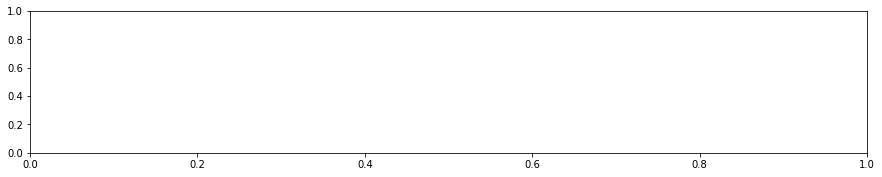

In [3]:
plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesclosedLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, alpha_oscClosed, '.', label ='alpha oscClosed')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, alpha_powerClosed, label = 'alpha powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, alpha_phaseClosed, label = 'alpha phaseClosed')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


In [ ]:
plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesclosedLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, beta_oscClosed, '.', label ='beta oscClosed')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, beta_powerClosed, label = 'beta powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, beta_phaseClosed, label = 'beta phaseClosed')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


In [ ]:
# POWER OVER TIME WHILE MONKEY ASLEEP

NameError: name 't_Open' is not defined

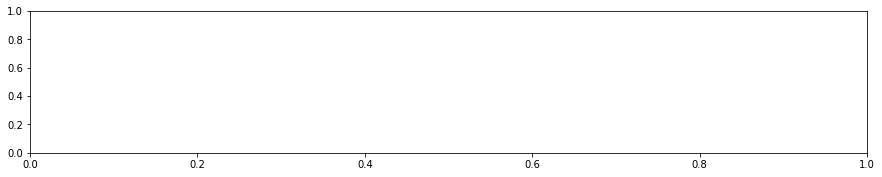

In [4]:
plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, sleepingMonkeyLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, theta_oscSleep, '.', label ='theta oscSleep')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, theta_powerSleep, label = 'theta powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, theta_phaseSleep, label = 'theta phaseSleep')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


NameError: name 't_Open' is not defined

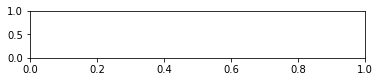

In [5]:
# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, sleepingMonkeyLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, gamma_oscSleep, '.', label ='gamma oscSleep')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, gamma_powerSleep, label = 'gamma powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, gamma_phaseSleep, label = 'gamma phaseSleep')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


NameError: name 't_Open' is not defined

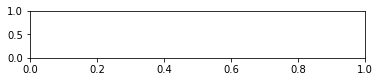

In [6]:
# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, sleepingMonkeyLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, alpha_oscSleep, '.', label ='alpha oscSleep')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, alpha_powerSleep, label = 'alpha powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, alpha_phaseSleep, label = 'alpha phaseSleep')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


NameError: name 't_Open' is not defined

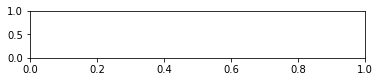

In [7]:
# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, sleepingMonkeyLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, beta_oscSleep, '.', label ='beta oscSleep')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, beta_powerSleep, label = 'beta  powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, beta_phaseSleep, label = 'beta phaseSleep')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


In [8]:
# PHASE AMPLITUDE COUPLING  BEGINS

In [9]:
#peaks and troughs for each wave in the open state

In [10]:
thetapeak_indsOpen = np.where(np.logical_and(theta_phaseOpen>-np.pi/2, theta_phaseOpen<np.pi/2))[0]
thetatrough_indsOpen = np.where(np.logical_or(theta_phaseOpen<-np.pi/2, theta_phaseOpen>np.pi/2))[0]

gammapeak_indsOpen = np.where(np.logical_and(gamma_phaseOpen>-np.pi/2, gamma_phaseOpen<np.pi/2))[0]
gammatrough_indsOpen = np.where(np.logical_or(gamma_phaseOpen<-np.pi/2, gamma_phaseOpen>np.pi/2))[0]

alphapeak_indsOpen = np.where(np.logical_and(alpha_phaseOpen>-np.pi/2, alpha_phaseOpen<np.pi/2))[0]
alphatrough_indsOpen = np.where(np.logical_or(alpha_phaseOpen<-np.pi/2, alpha_phaseOpen>np.pi/2))[0]

betapeak_indsOpen = np.where(np.logical_and(beta_phaseOpen>-np.pi/2, beta_phaseOpen<np.pi/2))[0]
betatrough_indsOpen = np.where(np.logical_or(beta_phaseOpen<-np.pi/2, beta_phaseOpen>np.pi/2))[0]

NameError: name 'theta_phaseOpen' is not defined

In [11]:
#peaks and troughs for each wave in the closed state
thetapeak_indsClosed = np.where(np.logical_and(theta_phaseClosed>-np.pi/2, theta_phaseClosed<np.pi/2))[0]
thetatrough_indsClosed = np.where(np.logical_or(theta_phaseClosed<-np.pi/2, theta_phaseClosed>np.pi/2))[0]

gammapeak_indsClosed = np.where(np.logical_and(gamma_phaseClosed>-np.pi/2, gamma_phaseClosed<np.pi/2))[0]
gammatrough_indsClosed = np.where(np.logical_or(gamma_phaseClosed<-np.pi/2, gamma_phaseClosed>np.pi/2))[0]

alphapeak_indsClosed = np.where(np.logical_and(alpha_phaseClosed>-np.pi/2, alpha_phaseClosed<np.pi/2))[0]
alphatrough_indsClosed = np.where(np.logical_or(alpha_phaseClosed<-np.pi/2, alpha_phaseClosed>np.pi/2))[0]

betapeak_indsClosed = np.where(np.logical_and(beta_phaseClosed>-np.pi/2, beta_phaseClosed<np.pi/2))[0]
betatrough_indsClosed = np.where(np.logical_or(beta_phaseClosed<-np.pi/2, beta_phaseClosed>np.pi/2))[0]

NameError: name 'theta_phaseClosed' is not defined

In [25]:
#peaks and troughs for each wave in the sleep state
thetapeak_indsSleep = np.where(np.logical_and(theta_phaseSleep>-np.pi/2, theta_phaseSleep<np.pi/2))[0]
thetatrough_indsSleep = np.where(np.logical_or(theta_phaseSleep<-np.pi/2, theta_phaseSleep>np.pi/2))[0]

gammapeak_indsSleep = np.where(np.logical_and(gamma_phaseSleep>-np.pi/2, gamma_phaseSleep<np.pi/2))[0]
gammatrough_indsSleep = np.where(np.logical_or(gamma_phaseSleep<-np.pi/2, gamma_phaseSleep>np.pi/2))[0]

alphapeak_indsSleep = np.where(np.logical_and(alpha_phaseSleep>-np.pi/2, alpha_phaseSleep<np.pi/2))[0]
alphatrough_indsSleep = np.where(np.logical_or(alpha_phaseSleep<-np.pi/2, alpha_phaseSleep>np.pi/2))[0]

betapeak_indsSleep = np.where(np.logical_and(beta_phaseSleep>-np.pi/2, beta_phaseSleep<np.pi/2))[0]
betatrough_indsSleep = np.where(np.logical_or(beta_phaseSleep<-np.pi/2, beta_phaseSleep>np.pi/2))[0]